# What are the states that exhibit strong correlation with (i) Pahang, and (ii) Johor?

## Pahang

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Correlation Between Cases

In [9]:
cases_state = pd.read_csv('./data/cases_state.csv', index_col=0)
cases_state.head()

,date,state,cases_new,cases_import,cases_recovered
0,2020-01-25,Johor,4,4,0.0
1,2020-01-25,Kedah,0,0,0.0
2,2020-01-25,Kelantan,0,0,0.0
3,2020-01-25,Melaka,0,0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0.0


In [10]:
cases_state_pivoted = cases_state.pivot(index='date', columns='state', values='cases_new')
cases_state_pivoted.head()

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
date,,,,,,,,,,,,,,,,
2020-01-25,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-29,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='state', ylabel='state'>

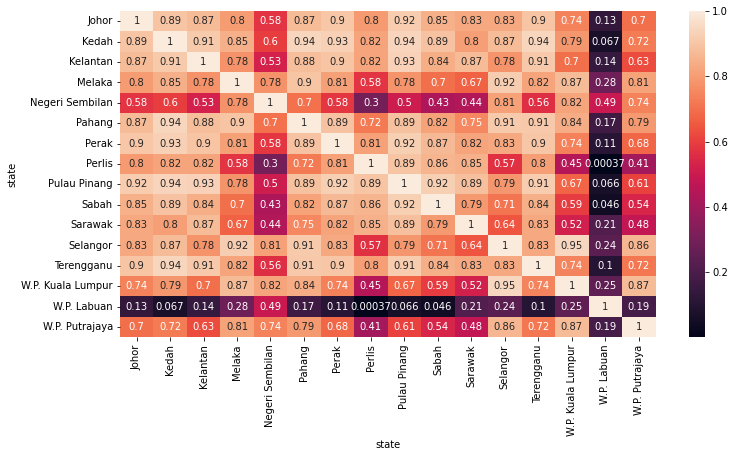

In [15]:
plt.figure(figsize=(12, 6))
cases_correlation = cases_state_pivoted.corr()
sns.heatmap(cases_correlation, annot=True)

In [18]:
cases_correlation['Pahang'].sort_values(ascending=False)

state
Pahang               1.000000
Kedah                0.943758
Selangor             0.911775
Terengganu           0.909531
Melaka               0.896620
Perak                0.893639
Pulau Pinang         0.887327
Kelantan             0.880140
Johor                0.874844
W.P. Kuala Lumpur    0.837598
Sabah                0.816316
W.P. Putrajaya       0.792965
Sarawak              0.750844
Perlis               0.720589
Negeri Sembilan      0.701812
W.P. Labuan          0.167614
Name: Pahang, dtype: float64

In [19]:
cases_correlation['Johor'].sort_values(ascending=False)

state
Johor                1.000000
Pulau Pinang         0.915221
Perak                0.904485
Terengganu           0.896105
Kedah                0.894732
Pahang               0.874844
Kelantan             0.873243
Sabah                0.848231
Selangor             0.830466
Sarawak              0.829551
Melaka               0.799038
Perlis               0.796383
W.P. Kuala Lumpur    0.741926
W.P. Putrajaya       0.696259
Negeri Sembilan      0.577630
W.P. Labuan          0.133619
Name: Johor, dtype: float64

## Correlation between Testing

In [33]:
tests_state = pd.read_csv('./data/tests_state.csv')
tests_state.head()

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306


In [35]:
tests_state['total'] = tests_state['rtk-ag'] + tests_state['pcr']
tests_state.head()

,date,state,rtk-ag,pcr,total
0,2021-07-01,Johor,2749,3670,6419
1,2021-07-01,Kedah,2073,1297,3370
2,2021-07-01,Kelantan,1348,1966,3314
3,2021-07-01,Melaka,1049,2132,3181
4,2021-07-01,Negeri Sembilan,2151,3306,5457


In [36]:
tests_pivoted = tests_state.pivot(index='date', columns='state', values='total')
tests_pivoted.head()

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
date,,,,,,,,,,,,,,,,
2021-07-01,6419,3370,3314,3181,5457,4708,4950,121,6160,6677,7522,30265,2367,10895,2181,443
2021-07-02,6883,2783,2779,3940,7636,4806,3686,108,5654,6563,8130,29475,1813,9983,1728,535
2021-07-03,5294,2936,1479,3321,4890,3994,3141,102,5788,6142,6391,28275,1346,11382,979,380
2021-07-04,5314,3165,2738,3119,3795,2957,2147,42,2543,4723,6901,21212,1815,6663,1377,210
2021-07-05,6865,3781,3639,2342,5327,4248,2804,181,5024,5739,6869,27300,1555,9077,1621,388


<AxesSubplot:xlabel='state', ylabel='state'>

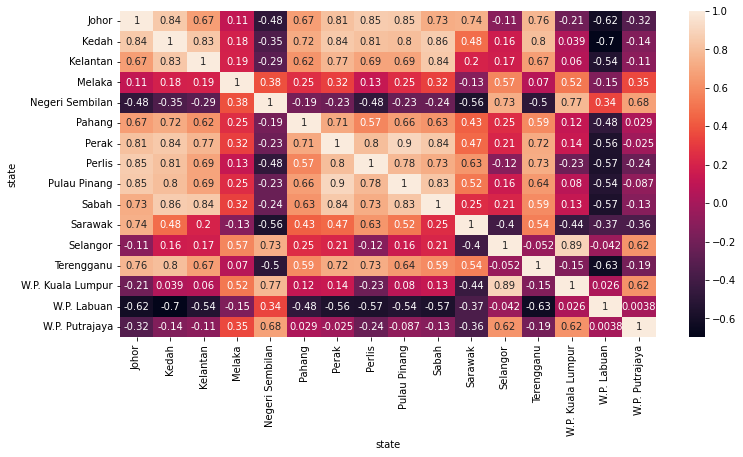

In [38]:
tests_correlation = tests_pivoted.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(tests_correlation, annot=True)

## Correlation between Deaths

In [40]:
deaths_state = pd.read_csv('./data/deaths_state.csv')
deaths_state.head()

,date,state,deaths_new,deaths_new_dod,deaths_bid,deaths_bid_dod
0,2020-03-17,Johor,1,1,0,0
1,2020-03-17,Kedah,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0


In [42]:
deaths_pivoted = deaths_state.pivot(index='date', columns='state', values='deaths_new')
deaths_pivoted.head()

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
date,,,,,,,,,,,,,,,,
2020-03-17,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-03-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-03-21,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:xlabel='state', ylabel='state'>

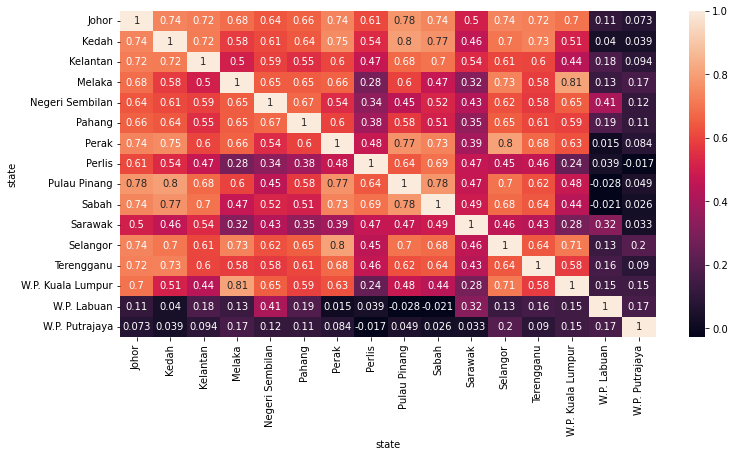

In [43]:
deaths_state_correlation = deaths_pivoted.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(deaths_state_correlation, annot=True)

In [45]:
tests_state.to_csv('./data/tests_state.csv')